<a href="https://colab.research.google.com/github/kjedrzejczak/Machine_Learning_Bootcamp_practice_II/blob/main/08_1_PCA_alaliza_g%C5%82%C3%B3wnych__sk%C5%82adowych_breast_cancer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

np.set_printoptions(precision=4, suppress=True, linewidth=200)

## Breas cancer dataset 👈

In [2]:
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
all_data = raw_data.copy()
data = all_data['data']
target = all_data['target']
data[:1]

array([[  17.99  ,   10.38  ,  122.8   , 1001.    ,    0.1184,    0.2776,    0.3001,    0.1471,    0.2419,    0.0787,    1.095 ,    0.9053,    8.589 ,  153.4   ,    0.0064,    0.049 ,    0.0537,
           0.0159,    0.03  ,    0.0062,   25.38  ,   17.33  ,  184.6   , 2019.    ,    0.1622,    0.6656,    0.7119,    0.2654,    0.4601,    0.1189]])

In [3]:
target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [4]:
data.shape

(569, 30)

Standaryzacja

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_std = scaler.fit_transform(data)
data_std[:1]

array([[ 1.0971, -2.0733,  1.2699,  0.9844,  1.5685,  3.2835,  2.6529,  2.5325,  2.2175,  2.2557,  2.4897, -0.5653,  2.833 ,  2.4876, -0.214 ,  1.3169,  0.724 ,  0.6608,  1.1488,  0.9071,  1.8867,
        -1.3593,  2.3036,  2.0012,  1.3077,  2.6167,  2.1095,  2.2961,  2.7506,  1.937 ]])

## PCA - 2 komponenty

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_std)
data_pca[:5]

array([[ 9.1928,  1.9486],
       [ 2.3878, -3.7682],
       [ 5.7339, -1.0752],
       [ 7.123 , 10.2756],
       [ 3.9353, -1.9481]])

In [7]:
pca_2 = pd.DataFrame(data={'pca_1':data_pca[:, 0], 'pca_2':data_pca[:, 1], 'class':target})
pca_2.replace(0, 'Begin', inplace=True)
pca_2.replace(1, 'Malignant', inplace=True)
pca_2.head()

,pca_1,pca_2,class
0,9.192837,1.948583,Begin
1,2.387802,-3.768172,Begin
2,5.733896,-1.075174,Begin
3,7.122953,10.275589,Begin
4,3.935302,-1.948072,Begin


In [8]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.442720,0.442720,1
1,0.189712,0.632432,2


In [9]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - components', width=950, template='plotly_dark'))
fig.show()

Wykres głównych składowych pca_1 oraz pca_2

In [10]:
px.scatter(pca_2, 'pca_1', 'pca_2', color=pca_2['class'], width=950, template='plotly_dark')

## PCA - 3 składowe

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_std)
data_pca[:5]

array([[ 9.1928,  1.9486, -1.1232],
       [ 2.3878, -3.7682, -0.5293],
       [ 5.7339, -1.0752, -0.5517],
       [ 7.123 , 10.2756, -3.2328],
       [ 3.9353, -1.9481,  1.3898]])

In [12]:
pca_3 = pd.DataFrame(data={'pca_1':data_pca[:, 0], 'pca_2':data_pca[:, 1], 'pca_3': data_pca[:, 2], 'class':target})
pca_3.replace(0, 'Begin', inplace=True)
pca_3.replace(1, 'Malignant', inplace=True)
pca_3.head()

,pca_1,pca_2,pca_3,class
0,9.192837,1.948583,-1.123163,Begin
1,2.387802,-3.768172,-0.529292,Begin
2,5.733896,-1.075174,-0.551749,Begin
3,7.122953,10.275589,-3.232788,Begin
4,3.935302,-1.948071,1.389767,Begin


In [13]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.442720,0.442720,1
1,0.189712,0.632432,2
2,0.093932,0.726364,3


In [14]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - components', width=950, template='plotly_dark'))
fig.show()

In [15]:
px.scatter_3d(pca_3, x='pca_1', y='pca_2', z='pca_3', color='class', symbol='class',
              opacity=0.6, size_max=10, width=950, template='plotly_dark')

## Zbiór danych MINST

In [16]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'X_train shape:', {X_train.shape})
print(f'X_test shape:', {X_test.shape})
print(f'y_train shape:', {y_train.shape})
print(f'y_test shape:', {y_test.shape})

X_train shape: {(60000, 28, 28)}
X_test shape: {(10000, 28, 28)}
y_train shape: {(60000,)}
y_test shape: {(10000,)}


In [17]:
X_train = X_train[:5000] # redukujemy ilośc danych w swiczeniu
y_train = y_train[:5000] # redukujemy ilośc danych w swiczeniu

In [18]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253, 205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,  90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253, 190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190, 253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35, 241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39, 148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221, 253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253, 253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253, 195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,  11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 136, 253, 253, 253, 212, 135, 132,  16,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

In [19]:
y_train[:5] # pięć pierwszych klas

array([5, 0, 4, 1, 9], dtype=uint8)

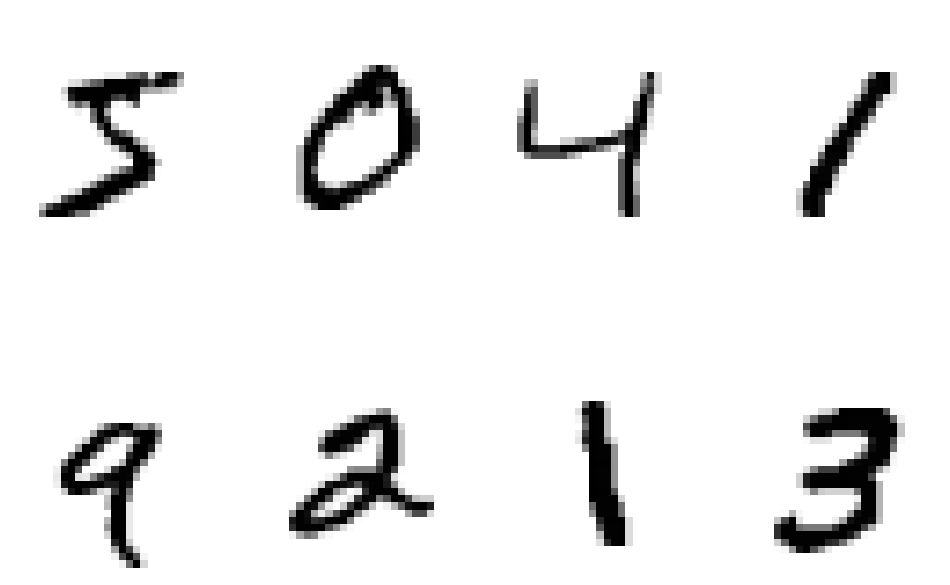

In [20]:
plt.figure(figsize=(12, 8))
for i in range(8):
  plt.subplot(240 + i + 1)
  plt.imshow(X_train[i], cmap='gray_r')
  plt.title(y_train[i], color='white', fontsize=17)
  plt.axis('off')
plt.show()

Standaryzacja

In [21]:
X_train = X_train/255.
X_test = X_test/255.
X_train.shape

(5000, 28, 28)

In [22]:
X_train = X_train.reshape(-1, 28 * 28) # 👈👈👈👈✨

In [23]:
X_train.shape

(5000, 784)

## PCA- 3 komponenty

In [24]:
pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train)
X_train_pca[:5]

array([[ 0.4555,  1.4465, -0.1262],
       [ 4.0678,  1.5156,  2.1628],
       [-0.1116, -1.7779, -0.6181],
       [-3.4395,  2.3378,  0.611 ],
       [-1.403 , -2.6952, -0.1727]])

In [25]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.098676,0.098676,1
1,0.074045,0.172721,2
2,0.061277,0.233998,3


In [26]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - components', width=950, template='plotly_dark'))
fig.show()

In [27]:
X_train_pca_df = pd.DataFrame(np.c_[X_train_pca, y_train], columns=['pca_1', 'pca_2', 'pca_3', 'class'])
X_train_pca_df['class'] = X_train_pca_df['class'].astype('str')
X_train_pca_df.head()

,pca_1,pca_2,pca_3,class
0,0.455498,1.446477,-0.126242,5.0
1,4.067758,1.515629,2.162823,0.0
2,-0.111563,-1.777877,-0.618112,4.0
3,-3.439460,2.337776,0.610986,1.0
4,-1.403047,-2.695199,-0.172730,9.0


In [28]:
px.scatter_3d(X_train_pca_df, x='pca_1', y='pca_2', z='pca_3', color='class', symbol='class',
              opacity=0.6, size_max=10, width=950, template='plotly_dark')

PCA procent komponentów

In [29]:
pca = PCA(n_components=0.95)  # wyjaśnia 95% wariancji z naszych danych

X_train_pca = pca.fit_transform(X_train)
X_train_pca[:1]

array([[ 0.4555,  1.4464, -0.1266, -2.0464, -0.9062,  0.8658,  0.7143,  0.3843,  1.2169, -0.5736,  0.2233, -1.8176, -1.0697,  2.8846,  0.0435,  0.4055, -1.3517, -0.4881,  0.7439,  1.2559,  0.491 ,
         0.8971,  0.7157,  0.7823, -0.2474, -0.3642,  1.3117,  0.4369,  0.4515, -0.1556, -0.5905,  0.0318, -0.0879, -0.1545, -0.1757, -0.4434,  0.7237, -0.3561,  0.4432,  1.7112,  0.2673, -0.8439,
        -0.3894, -0.1528, -0.044 , -0.5125, -0.6194, -0.1968,  0.2109, -0.3994,  0.3107, -0.0907,  0.1361, -0.5926,  0.0147,  0.7161,  0.497 ,  0.6163, -0.2884, -0.1627,  0.5686, -0.1277,  0.6545,
        -0.3407,  0.7817,  0.2586, -0.0567, -0.2488, -0.3312, -0.1065, -0.0352, -0.6306,  0.0124, -0.2624, -0.3622, -0.29  ,  0.0276,  0.2364,  0.1238, -0.0304, -0.0702, -0.2134, -0.0943,  0.0714,
        -0.4736, -0.3605, -0.2183,  0.1694, -0.233 , -0.1073,  0.2171, -0.0678,  0.043 ,  0.2504, -0.0245, -0.1631,  0.0138,  0.2231,  0.3506,  0.0314, -0.5392, -0.0519, -0.2189,  0.1758, -0.036 ,
        -0.0488

In [30]:
pca.n_components_ # 148 zmiennych trzyma 95% wariancji

148

Wyjaśniona warjancja

In [31]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.098676,0.098676,1
1,0.074045,0.172721,2
2,0.061277,0.233998,3
3,0.054053,0.288051,4
4,0.047376,0.335427,5
...,...,...,...
143,0.000497,0.948219,144
144,0.000491,0.948711,145
145,0.000482,0.949193,146
146,0.000473,0.949665,147


In [32]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - components', width=950, template='plotly_dark'))
fig.show()